In [2]:
from datetime import datetime
 
now = datetime.now()
today = now.strftime("%Y-%m-%d")
today

'2025-06-17'

1. manse_tool_agent
2. retriever_tool_agent
3. 일반 답변에 대한 web search

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
# Enhanced Retriever 및 Chain (Query Expansion 포함)

In [5]:
# 기존 Retriever 및 Chain (원래대로 복원)
from pdf_retriever_saju import pdf_rag_chain, compression_retriever

pdf_retriever = compression_retriever()
pdf_chain = pdf_rag_chain()

In [6]:
# Manse_tool

In [7]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from manse_6 import calculate_saju_tool

# Agent 생성 시 tools 리스트에 추가

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)
tools = [calculate_saju_tool]  # 사주 툴 추가

manse_tool_agent = create_react_agent(llm, tools)

In [11]:
response = manse_tool_agent.invoke({"messages": [("user", "1995년 3월 28일 남자, 12시 30분")]})

In [12]:
print(response["messages"][-1].content)

1995년 3월 28일 12시 30분에 태어난 남성의 사주팔자를 분석해보면 다음과 같습니다.

- 년주: 을해
- 월주: 기묘
- 일주: 무오
- 시주: 무오
- 일간: 무

오행의 강약은 토가 가장 강하고, 그 다음으로 목, 화, 수, 금 순입니다. 금이 부족한 편입니다.

십신 분석에서는 년주에 정관과 편재, 편관이 혼재되어 있고, 월주에는 겁재와 정관, 일주와 시주에는 정인과 겁재가 주로 나타납니다.

대운은 5세부터 10년 단위로 무인, 정축, 병자, 을해 순으로 변화하며, 현재 25세부터 2029년까지 병자 대운에 해당합니다.

이 사주는 토의 기운이 강하고 금의 기운이 약한 편이므로, 금과 관련된 분야나 활동에 신경을 쓰면 좋습니다. 또한 정관과 편재가 혼재되어 있어 직업이나 재물운에 있어서 균형을 잘 맞추는 것이 중요합니다.


In [13]:
response = manse_tool_agent.invoke({"messages": [("user", "1997년 9월 1일 여자, 11시 30분")]})
print(response["messages"][-1].content)

1997년 9월 1일 여자, 11시 30분 출생자의 사주팔자를 분석해보면 다음과 같습니다.

- 년주: 정축
- 월주: 무신
- 일주: 병오
- 시주: 계사
- 일간: 병화

오행의 강약은 화가 가장 강하고, 그 다음으로 토, 수, 금 순이며 목은 없습니다.

십신 분석에서는 겁재, 상관, 정관, 편재, 식신 등이 주요하게 나타납니다.

대운은 6세부터 10년 단위로 기유, 경술, 신해, 임자 대운이 순서대로 진행됩니다.

이 사주는 화의 기운이 강해 열정적이고 활동적인 성격을 가질 가능성이 높으며, 토와 수의 조화로 안정감과 지혜도 함께 갖추고 있습니다. 다만 목의 기운이 부족해 창의력이나 성장 동력에 다소 제약이 있을 수 있습니다.

더 구체적인 운세나 성격, 직업 적성 등 궁금한 점이 있으면 알려주세요.


In [8]:
from langchain_core.tools.retriever import create_retriever_tool
from langchain_core.prompts import PromptTemplate


# PDF 문서를 기반으로 검색 도구 생성
retriever_tool = create_retriever_tool(
    pdf_retriever,
    "pdf_retriever",
    "A tool for searching information related to Saju (Four Pillars of Destiny)",
    document_prompt=PromptTemplate.from_template(
        "<document><context>{page_content}</context><metadata><source>{source}</source><page>{page}</page></metadata></document>"
    ),
)


In [9]:
retriever_tools = [retriever_tool]

In [10]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
from langchain_core.prompts import load_prompt, ChatPromptTemplate, MessagesPlaceholder

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

retriever_tool_agent = create_react_agent(llm, retriever_tools)

base_prompt = load_prompt("prompt/saju-rag-promt_2.yaml")
saju_prompt = ChatPromptTemplate.from_messages([
    ("system", base_prompt.template),
    MessagesPlaceholder("messages"),
])
retriever_tool_agent = create_react_agent(llm, retriever_tools, prompt=saju_prompt) 

In [13]:
response = retriever_tool_agent.invoke({"messages": [("user", "1995년 3월 28일 남자의 사주 알려줘")]})

In [13]:
print(response["messages"][-1].content)

안녕하세요. 1995년 3월 28일 남자분의 사주를 분석해드리겠습니다.

우선, 태어난 날짜와 시간을 기준으로 정확한 천간지지(년, 월, 일, 시)를 변환해야 합니다. 다만, 태어난 시간이 없으므로 기본적으로 12지지 시간대 중 어느 시간대인지 알려주시면 더욱 정확한 분석이 가능합니다. 예를 들어, 자시(23:00~01:00), 축시(01:00~03:00) 등입니다.

현재 시간 정보가 없으므로, 우선 1995년 3월 28일의 사주(년, 월, 일) 천간지지 변환과 오시(11:30~13:30) 기준 시주를 가정하여 분석을 진행하겠습니다.

---

### 1. 사주 구조 (천간지지)

- 년주: 을해(乙亥)년 (1995년)
- 월주: 갑진(甲辰)월 (3월)
- 일주: 병인(丙寅)일 (28일)
- 시주: 병오(丙午)시 (오시, 11:30~13:30 가정)

---

### 2. 오행(五行) 분석

#### 1) 천간지지 → 오행 매핑

| 천간/지지 | 오행  |
|-----------|-------|
| 甲, 乙, 寅, 卯 | 목(木) |
| 丙, 丁, 巳, 午 | 화(火) |
| 戊, 己, 辰, 戌, 丑, 未 | 토(土) |
| 庚, 辛, 申, 酉 | 금(金) |
| 壬, 癸, 子, 亥 | 수(水) |

#### 2) 사주 8글자

- 년간: 乙 (목)
- 년지: 亥 (수)
- 월간: 甲 (목)
- 월지: 辰 (토)
- 일간: 丙 (화)
- 일지: 寅 (목)
- 시간간: 丙 (화)
- 시지: 午 (화)

#### 3) 오행 점수 계산

| 글자 | 오행 | 점수 |
|-------|-------|-------|
| 乙    | 목    | 1     |
| 亥    | 수    | 1     |
| 甲    | 목    | 1     |
| 辰    | 토    | 1     |
| 丙    | 화    | 1     |
| 寅    | 목    | 1     |
| 丙    | 화    | 1     |
| 午    | 화    | 1     |

#### 

In [11]:
# Query Expansion Agent (manse_tool처럼 간단하게)
from query_expansion_agent import get_query_expansion_agent

query_expansion_agent = get_query_expansion_agent()


In [15]:
# Query Expansion Agent 올바른 사용법 테스트
response = query_expansion_agent.invoke({"messages": [("user", "1995년 3월 28일 남자 사주")]})
print(response["messages"][-1].content)


확장된 영어 질문은 다음과 같습니다:

"Could you provide a birth chart analysis for a male born on March 28, 1995, focusing on the Four Pillars of Destiny (Ba Zi)? I am interested in understanding the implications of his birth date on his personality, career prospects, and overall life path. Please analyze the birth chart and Great Luck Period (Da Yun) based on Four Pillars of Destiny."

이 질문을 사용하여 문서 검색을 진행하실 수 있습니다. 추가적인 도움이 필요하시면 말씀해 주세요!


In [12]:
from query_expansion_agent import get_query_expansion_node

query_expansion_node = get_query_expansion_node()


In [13]:

# 노드 테스트
test_state = {"messages": [("user", "정관이 뭐야?")]}
result = query_expansion_node(test_state)

print("노드 테스트 결과:")
print(f"원본 질문: {result.get('original_query')}")
print(f"확장된 질문: {result.get('expanded_query')}")
print(f"확장 결과: {result.get('expansion_result')}")


노드 테스트 결과:
원본 질문: ('user', '정관이 뭐야?')
확장된 질문: What is the concept of "Jeonggwan" (正官) in the context of the Four Pillars of Destiny (Ba Zi)? I would like to understand its significance and how it influences one's birth chart analysis, particularly in relation to career and authority.
확장 결과: 
[Query Expansion 결과]
원본 질문: ('user', '정관이 뭐야?')
확장된 영어 질문: What is the concept of "Jeonggwan" (正官) in the context of the Four Pillars of Destiny (Ba Zi)? I would like to understand its significance and how it influences one's birth chart analysis, particularly in relation to career and authority.

검색을 위해 확장된 쿼리를 사용합니다.



In [14]:
from query_expansion_agent import get_query_expansion_node

query_expansion_node = get_query_expansion_node()

# 노드 테스트
test_state = {"messages": [("user", "1995년 3월 28일 남자 사주")]}
result = query_expansion_node(test_state)

print("노드 테스트 결과:")
print(f"원본 질문: {result.get('original_query')}")
print(f"확장된 질문: {result.get('expanded_query')}")
print(f"확장 결과: {result.get('expansion_result')}")

노드 테스트 결과:
원본 질문: ('user', '1995년 3월 28일 남자 사주')
확장된 질문: Could you provide a detailed analysis of the Four Pillars of Destiny (Ba Zi) for a male born on March 28, 1995? I am interested in understanding how his birth chart influences his personality, career prospects, and overall life path. Please analyze the birth chart and Great Luck Period (Da Yun) based on Four Pillars of Destiny.
확장 결과: 
[Query Expansion 결과]
원본 질문: ('user', '1995년 3월 28일 남자 사주')
확장된 영어 질문: Could you provide a detailed analysis of the Four Pillars of Destiny (Ba Zi) for a male born on March 28, 1995? I am interested in understanding how his birth chart influences his personality, career prospects, and overall life path. Please analyze the birth chart and Great Luck Period (Da Yun) based on Four Pillars of Destiny.

검색을 위해 확장된 쿼리를 사용합니다.



In [15]:
from langchain_teddynote.tools.tavily import TavilySearch
from langchain.tools import DuckDuckGoSearchRun, DuckDuckGoSearchResults

tavily_tool = TavilySearch(
    max_results=5,
    include_domains=["namu.wiki", "wikipedia.org"]
)

duck_tool = DuckDuckGoSearchResults(
    max_results=5,
)

In [16]:
# web_tool = [tavily_tool]
web_tool = [tavily_tool, duck_tool]

In [17]:
prompt = """
사주 또는 사주 오행의 개념적 질문이나, 일상 질문이 들어오면, web search를 통해 답합니다.
"""
web_tool_agent = create_react_agent(llm, tools=web_tool, prompt=prompt)

In [18]:
response = web_tool_agent.invoke({"messages": [("user", "사주오행에 대해서 설명해줘")]})

In [26]:
response

{'messages': [HumanMessage(content='사주오행에 대해서 설명해줘', additional_kwargs={}, response_metadata={}, id='0b8ff6a0-7500-4a45-b7aa-7680892d8292'),
  AIMessage(content="사주오행은 동양 철학과 점성학에서 중요한 개념으로, 사람의 운명과 성격, 인생의 흐름을 해석하는 데 사용됩니다. '사주'는 태어난 연, 월, 일, 시의 네 기둥(四柱)을 의미하며, 각각 천간(하늘의 기운)과 지지(땅의 기운)로 구성되어 있습니다. 이 네 기둥을 통해 개인의 운명을 분석합니다.\n\n'오행'은 우주 만물을 구성하는 다섯 가지 기본 원소인 목(木), 화(火), 토(土), 금(金), 수(水)를 말합니다. 각각의 오행은 특정한 성질과 상호작용을 가지며, 사주에서는 이 오행들이 어떻게 조화를 이루고 충돌하는지에 따라 개인의 운세와 성격을 해석합니다.\n\n간단히 정리하면:\n- 목(木): 나무, 성장과 발전, 생명력\n- 화(火): 불, 열정과 에너지, 변화\n- 토(土): 흙, 안정과 중심, 신뢰\n- 금(金): 금속, 결단과 강인함, 수확\n- 수(水): 물, 지혜와 유연성, 감정\n\n사주오행은 이 다섯 가지 요소가 개인의 사주에 어떻게 배치되어 있는지 분석하여, 그 사람의 성격, 건강, 직업, 인간관계, 운세 등을 예측하는 데 활용됩니다. 더 구체적인 사주 분석이나 오행의 상생(서로 돕는 관계)과 상극(서로 억제하는 관계)에 대해서도 궁금하면 알려드릴 수 있습니다.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 369, 'prompt_tokens': 181, 'total_tokens': 550, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 

In [26]:
print(response["messages"][-1].content)

사주오행은 동양 철학과 점성학에서 중요한 개념으로, 사람의 운명과 성격, 인생의 흐름을 해석하는 데 사용됩니다. '사주'는 태어난 연, 월, 일, 시의 네 기둥(四柱)을 의미하며, 각각의 기둥은 천간(하늘의 기운)과 지지(땅의 기운)로 구성되어 있습니다. 이 네 기둥을 통해 개인의 운명을 분석합니다.

'오행'은 우주 만물을 구성하는 다섯 가지 기본 원소인 목(木), 화(火), 토(土), 금(金), 수(水)를 말합니다. 사주에서는 이 오행이 각 기둥의 천간과 지지에 배치되어 있어, 이들의 상호작용을 통해 개인의 성격, 건강, 운세 등을 해석합니다.

간단히 정리하면:
- 목(木): 나무, 성장과 발전, 생명력
- 화(火): 불, 열정과 에너지, 변화
- 토(土): 흙, 안정과 중심, 신뢰
- 금(金): 금속, 결단과 강인함, 수확
- 수(水): 물, 지혜와 유연성, 감정

사주오행은 이 다섯 원소가 균형을 이루는지, 어느 원소가 부족하거나 과한지를 분석하여 개인의 운명을 예측하고 조언을 제공합니다. 더 궁금한 점이나 구체적인 사주풀이가 필요하면 알려주세요!


In [19]:
# GeneralQA Tool
from langchain.tools import  tool
from langchain_google_genai import ChatGoogleGenerativeAI
google_llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

@tool
def general_qa_tool(query: str) -> str:
    """
    일반적인 질문이나 상식적인 내용에 대해 답변합니다. 사주와 관련 없는 모든 질문에 사용할 수 있습니다.
    """
    google_llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
    return google_llm.invoke(query)

In [20]:
from langgraph.prebuilt import create_react_agent

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
general_qa_tools = [general_qa_tool]

prompt = "일반적인 질문이나 상식적인 내용에 대해 답변합니다."

general_qa_agent = create_react_agent(llm, tools=general_qa_tools, prompt=prompt)

# Agent node 생성

In [21]:
from langchain_core.messages import HumanMessage

# 지정한 agent와 name을 사용하여 agent 노드를 생성
def agent_node(state, agent, name):

    # agent 호출
    agent_response = agent.invoke(state)
    # agent의 마지막 메시지를 HumanMessage로 변환하여 반환
    return {
        "messages": [
            HumanMessage(content=agent_response["messages"][-1].content, name=name)
        ]
    }

# node 생성

In [22]:
import functools

manse_tool_agent_node = functools.partial(agent_node, agent=manse_tool_agent, name="ManseTool")
retriever_tool_agent_node = functools.partial(agent_node, agent=retriever_tool_agent, name="RetrieverTool")
web_tool_agent_node = functools.partial(agent_node, agent=web_tool_agent, name="WebTool")
general_qa_agent_node = functools.partial(agent_node, agent=general_qa_agent, name="GeneralQA")

# 노드 실험

In [31]:
manse_message = manse_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="1995년 3월 28일 남자")
        ]
    }
)
print(manse_message)

{'messages': [HumanMessage(content='1995년 3월 28일 남자분의 사주팔자를 분석해보면 다음과 같습니다.\n\n- 년주: 을해\n- 월주: 기묘\n- 일주: 무오\n- 시주: 무오\n- 일간: 무\n\n오행 강약은 토가 가장 강하고, 목과 화가 그 다음이며 금은 거의 없는 편입니다.\n\n십신 분석에서는 년주에 정관과 편재, 편관이 혼재되어 있고, 월주에는 겁재와 정관, 일주와 시주에는 정인과 겁재가 주로 나타납니다.\n\n대운은 5세부터 무인, 15세부터 정축, 25세부터 병자, 35세부터 을해 대운이 순서대로 진행됩니다.\n\n이 사주는 토의 기운이 강해 안정적이고 현실적인 성향이 강하며, 정관과 편재가 있어 책임감과 재물운이 좋은 편입니다. 다만 금의 기운이 약해 결단력이나 추진력에서 보완이 필요할 수 있습니다.', additional_kwargs={}, response_metadata={}, name='ManseTool')]}


In [32]:
retriever_message =  retriever_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="1995년 3월 28일 남자 12시 30분")
        ]
    }
)
print(retriever_message)

{'messages': [HumanMessage(content='안녕하세요. 1995년 3월 28일 남자 12시 30분 출생 사주 분석을 진행하겠습니다.\n\n---\n\n### 1. 사주 구조 (천간지지 변환)\n\n- 출생일: 1995년 3월 28일 (양력 기준)\n- 출생시간: 12시 30분 → 지지 시간대는 午시 (11:30~13:30)\n\n#### 1) 연주 (년간, 년지)\n- 1995년은 을해년 (乙亥年)\n  - 연간: 乙 (을목)\n  - 연지: 亥 (해수)\n\n#### 2) 월주 (월간, 월지)\n- 3월은 음력 2월 또는 3월에 따라 다르나, 양력 3월 28일은 음력 2월 28일경으로 추정\n- 1995년 3월의 월주는 병진월 (丙辰月)\n  - 월간: 丙 (병화)\n  - 월지: 辰 (진토)\n\n#### 3) 일주 (일간, 일지)\n- 1995년 3월 28일의 일주는 을사일 (乙巳日)\n  - 일간: 乙 (을목)\n  - 일지: 巳 (사화)\n\n#### 4) 시주 (시간간, 시간지)\n- 12시 30분은 午시 (11:30~13:30)\n- 午시는 병화(丙) 시간\n  - 시간간: 丙 (병화)\n  - 시간지: 午 (오화)\n\n---\n\n### 2. 사주 8자 (천간지지) 정리\n\n| 구분 | 천간 | 지지 |\n|------|------|------|\n| 연주 | 乙   | 亥   |\n| 월주 | 丙   | 辰   |\n| 일주 | 乙   | 巳   |\n| 시주 | 丙   | 午   |\n\n→ 8자: 乙 亥 丙 辰 乙 巳 丙 午\n\n---\n\n### 3. 오행 분포 분석\n\n#### 1) 오행 분류표\n\n| 오행 | 천간/지지 문자 |\n|-------|----------------|\n| 목(木) | 甲, 乙, 寅, 卯 |\n| 화(火) | 丙, 丁, 巳, 午 |\n| 토(土) | 戊, 己, 辰, 戌, 丑, 未 |\n| 금(金) | 庚, 辛, 申, 酉 |\n| 수(水) | 壬, 癸, 子, 亥 |\n\n#### 

In [33]:
web_message = web_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="사주오행에서의 불")
        ]
    }
)
print(web_message)


{'messages': [HumanMessage(content="사주오행에서 '불(火)'은 오행 중 하나로, 다섯 가지 기본 요소인 목(木), 화(火), 토(土), 금(金), 수(水) 중 '화(火)'를 의미합니다. 불은 다음과 같은 개념과 상징을 가집니다.\n\n1. **속성 및 상징**  \n   - 불은 열정, 에너지, 빛, 따뜻함, 변화, 활동성을 상징합니다.  \n   - 밝고 활기찬 성격, 강한 의지와 추진력을 나타냅니다.\n\n2. **계절과 방향**  \n   - 불은 여름과 남쪽을 상징합니다.  \n   - 여름의 뜨거운 태양과 같은 기운을 지니고 있습니다.\n\n3. **색깔**  \n   - 붉은색, 주황색, 분홍색 등이 불의 색으로 여겨집니다.\n\n4. **사람의 성격과 건강**  \n   - 불의 기운이 강한 사람은 열정적이고 활발하며 리더십이 뛰어납니다.  \n   - 반면 과하면 성급하거나 다혈질일 수 있습니다.  \n   - 건강 면에서는 심장, 혈액순환과 관련이 깊습니다.\n\n5. **상생과 상극**  \n   - 상생: 목(木)이 불을 키우고, 불은 토(土)를 생성합니다.  \n   - 상극: 불은 수(水)와 상극 관계로, 물은 불을 끄는 역할을 합니다.\n\n사주에서 불의 위치와 강약에 따라 그 사람의 성격, 운명, 건강 상태 등이 해석됩니다. 더 구체적인 사주 분석을 원하시면 태어난 연월일시를 알려주시면 도움을 드릴 수 있습니다.", additional_kwargs={}, response_metadata={}, name='WebTool')]}


In [34]:
# GeneralQA 테스트
general_qa_message = general_qa_agent_node(
    {
        "messages": [
            HumanMessage(content="파이썬에서 리스트와 튜플의 차이점?")
        ]
    }
)
print(general_qa_message)

{'messages': [HumanMessage(content='파이썬에서 리스트와 튜플은 모두 여러 개의 항목을 담을 수 있는 자료구조이지만, 몇 가지 중요한 차이점이 있습니다.\n\n### 1. 가변성 (Mutability)\n- **리스트 (List)**: 가변적(Mutable)입니다. 즉, 리스트를 생성한 후에도 요소를 추가, 삭제, 변경할 수 있습니다.\n- **튜플 (Tuple)**: 불변적(Immutable)입니다. 튜플을 생성한 후에는 요소를 변경할 수 없습니다. 요소를 추가, 삭제, 수정하려고 하면 에러가 발생합니다.\n\n### 2. 문법\n- **리스트 (List)**: 대괄호 `[]`를 사용하여 정의합니다.\n  ```python\n  my_list = [1, 2, 3, "hello"]\n  ```\n- **튜플 (Tuple)**: 소괄호 `()`를 사용하여 정의합니다.\n  ```python\n  my_tuple = (1, 2, 3, "hello")\n  ```\n  - 요소가 하나인 튜플을 만들 때는 쉼표를 붙여야 합니다. 예: `my_tuple = (1,)`\n\n### 3. 성능\n- **튜플 (Tuple)**: 일반적으로 리스트보다 약간 더 빠릅니다. 튜플은 불변성이 보장되므로, 파이썬 인터프리터가 튜플을 최적화하기 쉽기 때문입니다. 특히 튜플을 함수의 인자로 전달하거나, 딕셔너리의 키로 사용할 때 성능상의 이점이 있습니다.\n\n### 4. 용도\n- **리스트 (List)**: 데이터가 변경될 가능성이 있는 경우에 사용합니다. 예를 들어, 사용자의 입력 데이터를 저장하거나, 프로그램 실행 중에 값이 변경되는 데이터를 저장할 때 적합합니다.\n- **튜플 (Tuple)**: 데이터가 변경되지 않아야 하는 경우에 사용합니다. 예를 들어, 좌표 (x, y), RGB 색상 코드 (255, 0, 0), 데이터베이스 레코드 등을 표현할 때 적합합니다. 또한, 튜플은 딕셔너리의 키로 사용할 수 있지만, 리스트는 사용할 수 없습니다.\n\n

# Agent Supervisor 생성

In [23]:
from pydantic import BaseModel
from typing import Literal

# 멤버 Agent 목록 정의 (QueryExpansion, GeneralQA 추가)
members = ["ManseTool", "RetrieverTool", "WebTool", "GeneralQA"]

# 다음 작업자 선택 옵션 목록 정의
options_for_next = ["FINISH"] + members

# 작업자 선택 응답 모델 정의: 다음 작업자를 선택하거나 작업 완료를 나타냄
class RouteResponse(BaseModel):
    next: Literal[*options_for_next]

In [ ]:
# system_prompt = (
#     "You are a supervisor tasked with orchestrating a multi-step workflow with the following specialized agents: {members}.\n"
#     "The tools are:\n"
#     "- ManseTool: For extracting and calculating Saju information (year, month, day, hour pillars) from user input (such as date/time of birth).\n"
#     "- RetrieverTool: For interpreting Saju details and providing all Saju or Four Pillars explanations, follow-up answers, and analysis based on calculated information.\n"
#     "- WebTool: ONLY for general or non-Saju-specific questions that require external web search, or for questions about the history or origins of Saju that are not covered by the calculated result.\n"
#     "- GeneralQA: For questions completely unrelated to Saju (e.g., programming, science, general knowledge, weather, etc.).\n\n"

#     "Your job is to:\n"
#     "1. Route the user's request to the most appropriate tool:\n"
#     "   - If the user input contains raw birth information (date/time, etc.), ALWAYS call ManseTool FIRST.\n"
#     "   - IMPORTANT: **After using ManseTool, you MUST ALWAYS call RetrieverTool next to interpret the calculated Saju results, including any follow-up or clarifying Saju-related questions. Do NOT skip this step.**\n"
#     "   - If the user asks ANY question related to Saju (e.g., explanation, meaning, further Saju guidance, or even requests about specific aspects of the Saju reading), always route to RetrieverTool—even if it is a follow-up question.\n"
#     "   - Only use WebTool if the user's question cannot be answered from the Saju calculation and is asking for general Saju theory, history, or needs external web information (e.g., 'What is the history of Saju?', 'Who invented Saju?', 'What does a certain Saju term mean globally?').\n"
#     "   - If the input is completely unrelated to Saju, call GeneralQA.\n"
#     "2. NEVER finish the workflow after ManseTool alone. Always pass the result to RetrieverTool before considering FINISH.\n"
#     "3. After all needed steps are complete, respond with FINISH.\n"
#     "You MUST always decide the most logical next agent for the task and strictly follow this tool sequence: ManseTool → RetrieverTool → (if necessary WebTool or GeneralQA) → FINISH."
# )


In [24]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI


# 시스템 프롬프트 정의: 작업자 간의 대화를 관리하는 감독자 역할
system_prompt = (
    "You are a supervisor tasked with orchestrating a multi-step workflow with the following specialized agents: {members}.\n"
    "The tools are:\n"
    "- ManseTool: For extracting and calculating Saju information (year, month, day, hour pillars) from user input (such as date/time of birth).\n"
    "- RetrieverTool: For interpreting Saju details and providing in-depth Saju or Four Pillars explanations and analysis based on calculated information.\n"
    "- WebTool: For answering general or conceptual questions about Saju, or handling everyday/non-specialized queries, by searching the web.\n"
    "- GeneralQA: For answering general questions that are NOT related to Saju at all (e.g., programming, science, general knowledge, weather, etc.).\n\n"

    "Your job is to:\n"
    "1. Route the user's request to the most appropriate tool:\n"
    "   - If the user input contains raw birth information (date/time, etc.), ALWAYS call ManseTool FIRST.\n"
    "   - IMPORTANT: **After using ManseTool, you MUST ALWAYS call RetrieverTool next to interpret the calculated Saju results, before finishing or moving to any other step. Do NOT skip this step.**\n"
    "   - If the input is purely a general, conceptual, or non-specialized Saju question, and does NOT require document search, call WebTool.\n"
    "   - If the input is completely unrelated to Saju, call GeneralQA.\n"
    "2. NEVER finish the workflow after ManseTool alone. Always pass the result to RetrieverTool before considering FINISH.\n"
    "3. For completely non-Saju questions, use GeneralQA directly.\n"
    "3. After all needed steps are complete, respond with FINISH.\n"
    "You MUST always decide the most logical next agent for the task and strictly follow this tool sequence."
)

# ChatPromptTemplate 생성
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
        (
            "system",
            "Given the conversation above, who should act next? "
            "Or should we FINISH? Select one of: {options}",
        ),
    ]
).partial(options=str(options_for_next), members=", ".join(members))

# LLM 초기화
llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

# Supervisor Agent 생성
def supervisor_agent(state):
    # 프롬프트와 LLM을 결합하여 체인 구성
    supervisor_chain = prompt | llm.with_structured_output(RouteResponse)
    # Agent 호출
    return supervisor_chain.invoke(state)

In [25]:
import operator
from typing import Sequence, Annotated
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

# 상태 정의
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]  # 메시지
    next: str  # 다음으로 라우팅할 에이전트

In [30]:
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

# Query Expansion 노드가 포함된 그래프 생성
workflow = StateGraph(AgentState)

# 그래프에 노드 추가: members = ["ManseTool", "QueryExpansion", "RetrieverTool", "WebTool", "GeneralQA"]
workflow.add_node("ManseTool", manse_tool_agent_node)
# workflow.add_node("QueryExpansion", query_expansion_node)  # Query Expansion 노드 추가
workflow.add_node("RetrieverTool", retriever_tool_agent_node)  # 기존 Retriever 사용
workflow.add_node("WebTool", web_tool_agent_node)
workflow.add_node("GeneralQA", general_qa_agent_node)  # GeneralQA 노드 추가
workflow.add_node("Supervisor", supervisor_agent)



# 멤버 노드 > Supervisor 노드로 엣지 추가
for member in members:
    workflow.add_edge(member, "Supervisor")

# 조건부 엣지 추가
conditional_map = {k: k for k in members}
conditional_map["FINISH"] = END

def get_next(state):
    return state["next"]

# Supervisor 노드에서 조건부 엣지 추가
workflow.add_conditional_edges("Supervisor", get_next, conditional_map)

# 시작점
# workflow.add_edge(START, "QueryExpansion")
workflow.add_edge(START, "Supervisor")

# 그래프 컴파일
graph = workflow.compile(checkpointer=MemorySaver())


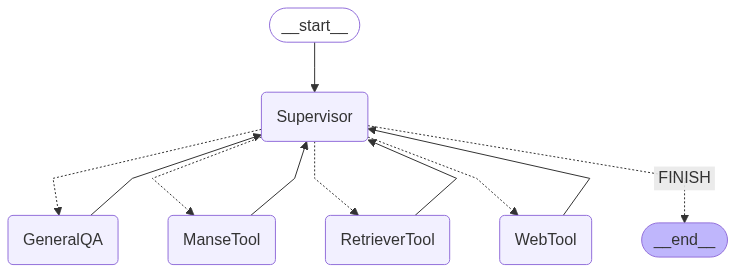

In [31]:
graph

In [32]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 3})

# 질문 입력
question = "1996년 12월 13일 남자, 10시 30분 출생 운세봐줘."

inputs = {
    "messages": [
        HumanMessage(
            content=question
            
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
=== 사주팔자 ===
년주(年柱): 병자
월주(月柱): 경자
일주(日柱): 갑신
시주(時柱): 기사
일간(日干): 갑

=== 오행 강약 ===
목: 20점
화: 29점
토: 25점
금: 30점
수: 34점

=== 십신 분석 ===
년주: 천간:식신, 지지:정인(100%)
월주: 천간:편관, 지지:정인(100%)
일주: 지지:편관(60%), 지지:편인(30%), 지지:편재(10%)
시주: 천간:정재, 지지:식신(60%), 지지:편재(30%), 지지:편관(10%)

=== 대운 (정밀 계산) ===
6세: 신축 (2002년 ~ 2011년)
16세: 임인 (2012년 ~ 2021년)
26세: 계묘 (2022년 ~ 2031년)
36세: 갑진 (2032년 ~ 2041년)
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
1996년 12월 13일 10시 30분에 태어난 남성의 사주팔자를 분석해보면 다음과 같습니다.

- 년주(年柱): 병자
- 월주(月柱): 경자
- 일주(日柱): 갑신
- 시주(時柱): 기사
- 일간(日干): 갑

오행의 강약은 목 20점, 화 29점, 토 25점, 금 30점, 수 34점으로 수와 금이 비교적 강한 편입니다.

십신 분석에서는 식신, 정인, 편관, 편인, 편재 등이 조화를 이루고 있습니다.

대운은 다음과 같이 흐릅니다.
- 6세부터 11년간 신축 대운 (2002년 ~ 2011년)
- 16세부터 10년간 임인 대운 (2012년 ~ 2021년)
- 26세부터 10년간 계묘 대운 (2022년 ~ 203

In [ ]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from manse_6 import calculate_saju_tool
# Agent 생성 시 tools 리스트에 추가

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)
tools = [calculate_saju_tool]  # 사주 툴 추가

manse_tool_agent = create_react_agent(llm, tools)

# 을해 을유 병진 을미
response = manse_tool_agent.invoke({"messages": [("user", "1995년 9월 22일 남자, 15시 30분")]})
print(response["messages"][-1].content)

1995년 9월 22일 15시 30분에 태어난 남성의 사주팔자는 다음과 같습니다.

- 년주: 을해
- 월주: 을유
- 일주: 병진
- 시주: 을미
- 일간: 병

오행 강약 점수는 목이 가장 강하고, 그 다음으로 화, 토, 금, 수 순입니다.

십신 분석에 따르면, 년주는 정인과 편관, 편인이 혼재되어 있고, 월주는 정인과 정재, 일주는 식신, 정인, 정관, 시주는 정인과 상관, 겁재, 정인이 포함되어 있습니다.

대운은 5세부터 시작하여 10년 단위로 갑신, 계미, 임오, 신사 대운이 이어집니다.

이 사주는 목의 기운이 강하고, 병화 일간이 목의 도움을 받는 구조로 보입니다. 더 구체적인 운세나 성격, 직업 적성 등 해석이 필요하면 알려주세요.


In [ ]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from manse_6 import calculate_saju_tool
# Agent 생성 시 tools 리스트에 추가

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)
tools = [calculate_saju_tool]  # 사주 툴 추가

manse_tool_agent = create_react_agent(llm, tools)

# 을해 을유 병진 을미
response = manse_tool_agent.invoke({"messages": [("user", "1995년 9월 22일 남자, 15시 30분")]})
print(response["messages"][-1].content)

1995년 9월 22일 15시 30분에 태어난 남성의 사주팔자는 다음과 같습니다.

- 년주: 을해
- 월주: 을유
- 일주: 병진
- 시주: 을미
- 일간: 병

오행 강약 점수는 목이 가장 강하고, 그 다음으로 화, 토, 금, 수 순입니다.

십신 분석에 따르면, 년주는 정인과 편관, 편인이 혼재되어 있고, 월주는 정인과 정재, 일주는 식신, 정인, 정관, 시주는 정인과 상관, 겁재, 정인이 포함되어 있습니다.

대운은 5세부터 시작하여 10년 단위로 갑신, 계미, 임오, 신사 대운이 이어집니다.

이 사주는 목의 기운이 강하고, 병화 일간이 목의 도움을 받는 구조로 보입니다. 더 구체적인 운세나 성격, 직업 적성 등 해석이 필요하면 알려주세요.


In [33]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 3})

# 질문 입력

question = "연애운이 궁금해"

inputs = {
    "messages": [
        HumanMessage(
            content=question
            
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1996년 12월 13일 10시 30분 출생 남성분의 연애운을 사주팔자와 오행, 십신 분석을 바탕으로 상세히 안내해 드리겠습니다.

---

## 1. 사주 구조 복습

- 년주: 병자 (丙子)
- 월주: 경자 (庚子)
- 일주: 갑신 (甲申)
- 시주: 기사 (己巳)

일간(日干)은 갑목(甲)으로, 본인의 본성, 성격, 자아를 나타냅니다.

---

## 2. 오행과 십신에서 본 연애운 특징

### 1) 십신 중 연애와 관련 깊은 신살

- **편관(偏官, 7살)**: 병(丙)년간과 시지(巳)에 편관이 두 개 있습니다. 편관은 권위, 도전, 경쟁을 의미하지만, 연애에서는 이성에 대한 관심과 매력, 때로는 긴장과 갈등을 나타냅니다.  
- **식신(食神)**: 시간(己)에 식신이 있어 표현력과 매력, 부드러운 소통 능력을 줍니다. 이는 연애에서 상대방에게 호감을 주고 관계를 원활하게 하는 긍정적 요소입니다.  
- **편재(偏財)**: 년지와 월지의 자(子)가 편재로 재물과 기회뿐 아니라 이성운과도 연결됩니다. 편재가 두 번 있어 이성운이 풍부하고 다양한 만남이 기대됩니다.

### 2) 일간 갑목과의 관계

- 갑목은 생명력 넘치고 따뜻한 성격으로, 연애에 있어 진실하고 헌신적인 면이 강합니다.  
- 다만, 편관이 강해 때로는 상대방과의 갈등이나 긴장감이 있을 수 있으니 조율이 필요합니다.

---

## 3. 대운과 연애운의 영향

- 현재 대운은 계묘(癸卯)로 수(水)와 목(木)이 보완되어 약한 목을 강화하는 시기입니다.  
- 목은 갑목 일간의 본질이므로, 이 시기는 본인의 매력과 자아가 더욱 빛나고, 연애운이 상승하는 좋은 시기입니다.  
- 2023~2025년 세운 역시 목과 수, 화가

In [34]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 3})

# 질문 입력

question = "지금 연애안한지 오래됐는데 연애를 하고싶어. 언제쯤 만날 수 있을까?"

inputs = {
    "messages": [
        HumanMessage(
            content=question
            
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1996년 12월 13일 10시 30분 출생 남성분의 연애운과 만남 시기를 사주와 대운, 세운을 바탕으로 상세히 분석해 드리겠습니다.

---

## 1. 현재 사주 및 대운 상황 복습

- 일간: 갑목(甲)
- 현재 대운: 계묘(癸卯, 2022~2031) → 수(水)와 목(木)이 보완되어 본인의 본질인 갑목이 강화되는 시기
- 세운(2023~2025): 목과 수, 화가 보완되어 연애운에 긍정적 영향

---

## 2. 연애 만남 시기 분석

### 1) 대운의 영향

- 현재 진행 중인 계묘 대운은 약한 목을 보완해 주는 좋은 대운으로, 본인의 매력과 자아가 빛나는 시기입니다.
- 특히 목(木)은 갑목 일간의 본질이므로, 이 대운 기간(2022~2031) 내에 좋은 인연을 만날 가능성이 큽니다.

### 2) 세운(연도별 운세) 분석

- 2023년 계묘(癸卯): 목과 수가 보완되어 만남과 소통이 원활한 시기
- 2024년 갑진(甲辰): 갑목과 진토가 안정과 성장을 돕는 시기, 연애에 긍정적
- 2025년 을사(乙巳): 을목과 사화가 추진력과 매력을 높여주는 시기

→ 2023년부터 2025년까지 3년간 연애운이 매우 좋은 흐름임을 알 수 있습니다.

### 3) 십신과 신살 관점

- 편재(偏財)인 자(子)가 두 번 있어 이성운과 만남 기회가 많으나, 편관(偏官)도 강해 갈등이나 긴장감이 있을 수 있으니 소통에 신경 써야 합니다.

---

## 3. 종합 조언 및 예상 만남 시기

- **현재부터 2025년까지가 연애를 시작하기에 매우 좋은 시기입니다.**  
- 특히 2023년과 2024년은 목과 수가 강해 본인의 매력과 표현력이 극대화되는 시기이므로, 적극적으로 만남을 추구하시길 권합니다.

In [35]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 3})

# 질문 입력

question = "미래에 대한 연애운은 어때?"

inputs = {
    "messages": [
        HumanMessage(
            content=question
            
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1996년 12월 13일 10시 30분 출생 남성분의 미래 연애운을 사주팔자와 대운, 세운을 바탕으로 상세히 분석해 드리겠습니다.

---

## 1. 사주 구조 및 현재 대운 복습

- 일간(日干): 갑목(甲)
- 현재 대운: 계묘(癸卯, 2022~2031) → 수(水)와 목(木)이 보완되어 본인의 본질인 갑목이 강화되는 시기
- 다음 대운: 갑진(甲辰, 2032~2041) → 갑목과 진토로 안정과 성장을 돕는 대운

---

## 2. 미래 연애운 전망

### 1) 2022년~2031년 계묘 대운

- 목과 수가 강해 본인의 매력과 자아가 빛나는 시기입니다.
- 갑목 일간에게 목은 본질적인 힘이므로, 이 시기에는 연애운이 매우 좋고, 좋은 인연을 만날 가능성이 큽니다.
- 특히 목이 강해지면서 창의력과 표현력이 좋아져 상대방과의 소통이 원활해지고, 매력도 상승합니다.
- 다만, 편관(偏官)이 강한 편이라 때때로 갈등이나 긴장감이 있을 수 있으니 상대방과의 이해와 배려가 중요합니다.

### 2) 2032년~2041년 갑진 대운

- 갑목과 진토가 조화를 이루어 안정과 성장을 돕는 시기입니다.
- 이 시기에는 연애 관계가 더욱 안정되고 깊어질 가능성이 높습니다.
- 토(土)는 목(木)을 생하는 역할도 하므로, 부족했던 토의 기운이 보완되어 관계의 안정감과 신뢰가 증대됩니다.

---

## 3. 세운(歲運) 분석 (2025년 이후 주요 연도)

- 2025년 을사(乙巳): 목과 화가 보완되어 추진력과 매력이 상승하는 시기
- 2026년 병오(丙午): 화가 강해 열정과 에너지가 넘치는 시기, 연애에 적극적일 수 있음
- 2027년 정미(丁未): 화와 토가 보완되어 안정과 열정이 조화되는 시기
- 2

In [37]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 3})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="1997년 09월 01일 여자, 11시 30분 출생 운세봐줘"
            
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you provide a fortune reading for a female born on September 1, 1997, at 11:30 AM? I am interested in a detailed analysis of her Four Pillars of Destiny (Ba Zi) and how her birth chart influences her personality, career prospects, and relationships.1997년 09월 01일 여자, 11시 30분 출생 운세봐줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
=== 사주팔자 ===
년주(年柱): 정축
월주(月柱): 무신
일주(日柱): 병오
시주(時柱): 계사
일간(日干): 병

=== 오행 강약 ===
목: 0점
화: 59점
토: 38점
금: 11점
수: 28점

=== 십신 분석 ===
년주: 천간:겁재, 지지:상관(60%), 지지:정관(30%), 지지:정재(10%)
월주: 천간:식신, 지지:편재(60%), 지지:편관(30%), 지지:식신(10%)
일주: 지지:겁재(70%), 지지:상관(30%)
시주: 천간:정관, 지지:식신(30%), 지지:편재(10%)

=== 대운 (정밀 계산) ===
6세: 기유 (2003년 ~ 2012년)
16세: 경술 (2013년 ~ 2022년)
26세: 신해 (2023년 ~ 2032년)
36세: 임자 (2033년 ~ 2042년)
🔄 Node: agent 🔄
- - - - - -

In [38]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 3})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="대운과 세운, 조심해야 할것들 알려줘"
            
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)



🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you provide insights on the major luck cycles (Da Yun) and annual luck cycles (Se Yun) in my Four Pillars of Destiny (Ba Zi) chart? Additionally, I would like to know what specific areas I should be cautious about during these cycles, based on my birth chart analysis.대운과 세운, 조심해야 할것들 알려줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1997년 9월 1일 오전 11시 30분 출생 여성분의 대운과 세운, 그리고 주의사항에 대해 상세히 분석해 드리겠습니다.

---

## 1. 대운(大運) 분석

### 대운 시작 나이 및 방향

- 출생 월(음력 7월, 무신월) 기준으로 여성은 대운을 역행(뒤로) 시작합니다.
- 대운 시작 나이는 보통 8세 전후이며, 정확한 시작 시점은 음력 생월과 생일에 따라 다르지만 대략 7~8세부터 시작한다고 봅니다.

### 대운 목록 및 해석

| 나이 구간 | 대운  | 천간지지 | 오행 구성 | 해석 및 특징                          |
|-----------|--------|----------|-----------|-------------------------------------|
| 0~8       | -      | -        | -         | 출생부터 대운 시작 전, 성장기        |
| 8~18    

In [39]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 3})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="금전운알려줘"
            
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you provide an analysis of my financial luck based on my Four Pillars of Destiny (Ba Zi)? I am particularly interested in understanding how my birth chart influences my financial opportunities and challenges.금전운알려줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1997년 9월 1일 오전 11시 30분 출생 여성분의 금전운에 대해 사주 원리와 오행, 십신 분석을 바탕으로 상세히 안내해 드리겠습니다.

---

## 1. 사주 구성 및 오행 요약

| 구분 | 천간 | 지지 | 오행 |
|-------|-------|-------|-------|
| 연주  | 丁     | 丑     | 화, 토 |
| 월주  | 戊     | 申     | 토, 금 |
| 일주  | 丙     | 午     | 화, 화 |
| 시주  | 癸     | 巳     | 수, 화 |

- 화(火) 4점, 토(土) 2점, 금(金) 1점, 수(水) 1점, 목(木) 0점
- 화가 매우 강하고, 토가 그 다음이며 금과 수는 약간, 목은 부족한 상태입니다.

---

## 2. 금전운과 관련된 십신 및 오행 해석

### 1) 금전운을 나타내는 십신

- 금전운은 일간(일주 천간 丙火) 기준으로 재성(財星)과 편재(偏財), 정재(正財)로 판단합니다.
- 火(일간 丙) 기준으로:
  - 재성(正財): 토(土) → 戊, 己, 丑, 辰, 戌, 未
  - 편재(偏財): 토(

In [40]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="1995년 3월 28일 남자, 12시 30분 출생 운세봐줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you provide a fortune reading for a male born on March 28, 1995, at 12:30 PM? I am interested in a detailed analysis of his Four Pillars of Destiny (Ba Zi) and how they may influence his personality, career prospects, and overall life path. Please include insights based on his birth chart analysis and any significant elements or interactions present in his chart.1995년 3월 28일 남자, 12시 30분 출생 운세봐줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
=== 사주팔자 ===
년주(年柱): 을해
월주(月柱): 기묘
일주(日柱): 무오
시주(時柱): 무오
일간(日干): 무

=== 오행 강약 ===
목: 39점
화: 20점
토: 68점
금: 0점
수: 10점

=== 십신 분석 ===
년주: 천간:정관, 지지:편재(70%), 지지:편관(30%)
월주: 천간:겁재, 지지:정관(100%)
일주: 지지:정인(70%), 지지:겁재(30%)
시주: 지지:정인(70%), 지지:겁재(30%)

=== 대운 (정밀 계산) ===
5세: 무인 (2000년 ~ 2009년)
15세: 정축 (2010년 ~ 2019년)
25

In [41]:
# 추가질문 -> 바로 retriever tool로 들어갔다

In [42]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="대운과 세운분석 자세히 해줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you provide a detailed analysis of my Daewoon (major luck cycle) and Sewoon (annual luck cycle) in relation to my Four Pillars of Destiny (Ba Zi)? I am particularly interested in understanding how these cycles influence my current life circumstances and future prospects based on my birth chart.대운과 세운분석 자세히 해줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1995년 3월 28일 12시 30분 출생 남성분의 대운과 세운(연운) 분석을 자세히 진행하겠습니다.

---

## 1. 대운(大運) 분석

### 대운 시작 시기 산출

- 출생 월: 3월 (양력)
- 출생 시: 午시 (11:30~13:30)
- 남성은 출생 월의 절기 기준으로 앞으로 대운이 진행됨
- 1995년 3월 28일은 춘분(3월 21일) 이후 출생이므로 대운은 출생 후 약 1년 5개월 후부터 시작 (대략 1세 5개월부터)

### 대운별 10년 주기 및 오행 특성

| 나이 구간 | 대운  | 천간지지 | 오행 및 특징                      |
|-----------|--------|-----------|---------------------------------|
| 1~10세    | 기미(己未) | 토(土) 중심 | 토 기운 강화, 안정과 성장 기반 마련 |
| 11~20세  

In [43]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="난 미래에 대한 대운과 세운분석이 궁금해"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
I am curious about the analysis of my luck cycles (Da Yun) and annual luck (Se Yun) in relation to my Four Pillars of Destiny (Ba Zi). Specifically, I would like to understand how these cycles will influence my future and what insights can be drawn from my birth chart analysis. Could you provide guidance on how to interpret these aspects in my life?난 미래에 대한 대운과 세운분석이 궁금해
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1995년 3월 28일 12시 30분 출생 남성분의 미래 대운과 세운(연운) 분석을 자세히 안내해 드리겠습니다.

---

## 1. 미래 대운(大運) 분석

### 대운 시작 시기 및 진행 방향

- 출생 월(3월) 기준으로 남성은 앞으로 대운이 진행됩니다.
- 대운 시작은 출생 후 약 1년 5개월부터 시작하여 10년 단위로 변화합니다.

### 미래 대운 목록 및 특징

| 나이 구간 | 대운  | 천간지지 | 오행 및 특징                      |
|-----------|--------|-----------|---------------------------------|
| 26~35세   | 임술(壬戌) | 수(土) 중심 | 감성, 지혜, 유연성 보완, 대인관계 개선 |
| 36~45세  

In [44]:
# Enhanced Retriever with Query Expansion 테스트
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 2})

# 한글 사주 질문으로 테스트 (Query Expansion이 작동할 질문)
inputs = {
    "messages": [
        HumanMessage(
            content="정관이 뭐야? 상세히 설명해줘"
        )
    ],
}


# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
What is the concept of "Jeonggwan" (正官) in the context of the Four Pillars of Destiny (Ba Zi)? Please provide a detailed explanation, including its significance in birth chart analysis and how it influences an individual's personality, career, and relationships. Additionally, could you elaborate on how Jeonggwan interacts with other elements in a person's birth chart?정관이 뭐야? 상세히 설명해줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
"정관"은 여러 분야에서 사용되는 용어로, 문맥에 따라 의미가 다를 수 있습니다. 하지만 일반적으로 가장 많이 쓰이는 두 가지 의미를 중심으로 설명드리겠습니다.

1. **사주명리학에서의 정관(正官)**  
사주명리학(사주팔자)에서 '정관'은 십신(十神) 중 하나로, 자신의 일간(日干, 태어난 날의 천간)과 음양이 같고, 오행의 관계에서 '관계'에 해당하는 천간을 말합니다.  
- 예를 들어, 일간이 갑목(甲木)일 때, 정관은 일간과 음양이 같고, 일간을 극하는 오행인 금(金) 중에서 음양이 같은 경금(庚金)이 됩니다.  
- 정관은 주로 '공적인 직업, 권위, 규율, 법, 책임감' 등을 상징합니다.  
- 정관이 강하면 책임감이 강하고, 사회적 지위나 명예를 중시하는 성향이 있다고 봅니다.  
- 

In [45]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, invoke_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="사주의 개념에 대해서 알려줘"
        )
    ],
}

# 그래프 실행
invoke_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================ Human Message =================================

사주의 개념에 대해서 알려줘

🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
next:
WebTool

🔄 Node: agent in [WebTool] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================== Ai Message ==================================

사주(四柱)는 한국과 중국 등 동아시아에서 전통적으로 사용되는 운명학의 한 분야로, 사람의 태어난 연, 월, 일, 시를 기준으로 하여 그 사람의 운명과 성격, 미래의 길흉화복을 해석하는 체계입니다. 

사주는 '네 기둥'이라는 뜻으로, 태어난 연도, 월, 일, 시를 각각 한 기둥으로 보고, 이 네 기둥을 합쳐서 개인의 운명을 분석합니다. 각 기둥은 천간(10간)과 지지(12지)로 구성되어 있으며, 이를 통해 오행(목, 화, 토, 금, 수)의 상호작용과 음양의 조화를 살펴봅니다.

사주를 통해 개인의 성격, 건강, 직업, 인간관계, 재물운, 결혼운 등 다양한 인생의 측면을 예측하고 조언하는 데 활용합니다. 또한, 사주는 운세뿐 아니라 자신과 주변 환경과의 조화를 이해하고, 더 나은 삶을 위한 방향을 찾는 데 도움을 주는 도구로 여겨집니다.

필요하면 사주의 구성 요소나 오행, 천간과 지지에 대해서도 자세히 설명해 드릴 수 있습니다.

🔄 Node: WebTool 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================ H

In [46]:
# GeneralQA 도구 테스트 - 일반 질문
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 2})

# 일반 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="파이썬에서 딕셔너리와 리스트의 차이점을 알려주세요"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)



🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you explain the differences between a dictionary and a list in Python, particularly in the context of data structures used for organizing information? Additionally, I am interested in understanding how these concepts might relate to the analysis of a birth chart in the Four Pillars of Destiny (Ba Zi), where different elements and their relationships can be represented in various formats.파이썬에서 딕셔너리와 리스트의 차이점을 알려주세요
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
## 파이썬 딕셔너리와 리스트의 차이점

파이썬에서 딕셔너리(dictionary)와 리스트(list)는 모두 여러 개의 값을 저장하는 데 사용되는 자료구조이지만, 몇 가지 중요한 차이점이 있습니다.

**1. 데이터 접근 방식:**

*   **리스트 (List):**
    *   **순서 기반 접근:** 리스트는 요소의 순서가 중요하며, 각 요소는 **인덱스(index)**를 통해 접근합니다. 인덱스는 0부터 시작하는 정수입니다.
    *   예시: `my_list[0]`은 리스트의 첫 번째 요소를 가져옵니다.